In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from utils import data, plot

## Exploratory Data Analysis

In [2]:
data_dir = 'data/CMAPSS'
subset = 1
train, test, header, n_meta, n_sensors, n_settings = data.load_cmapss_subset(
    data_dir, subset)

### Data Shape and Values

In [3]:
print('Train Shape:', train.shape, 'Test Shape:', test.shape)

train.head()
test.head()

Train Shape: (20631, 27) Test Shape: (13096, 27)


,unit,time,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138.0


### Distribution of RUL

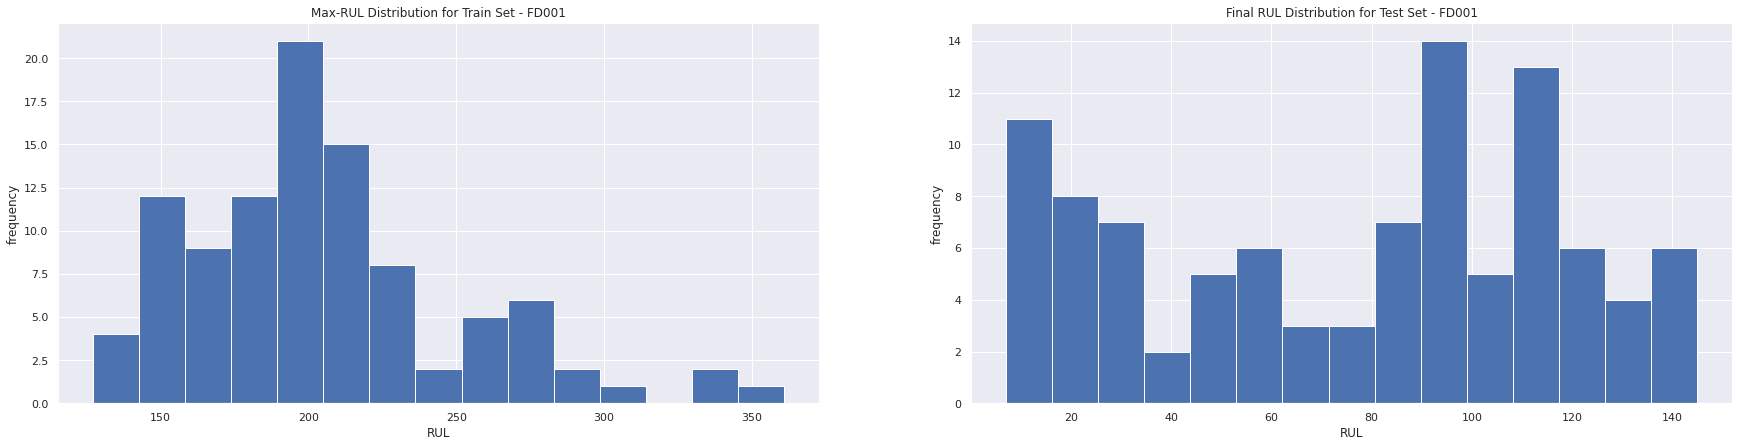

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(30, 7))
axes[0] = plot.show_rul_distribution(train, axes[0], split='train', subset=subset)
axes[1] = plot.show_rul_distribution(test, axes[1], split='test', subset=subset)
fig.show()

### Evolution of Sensor Values

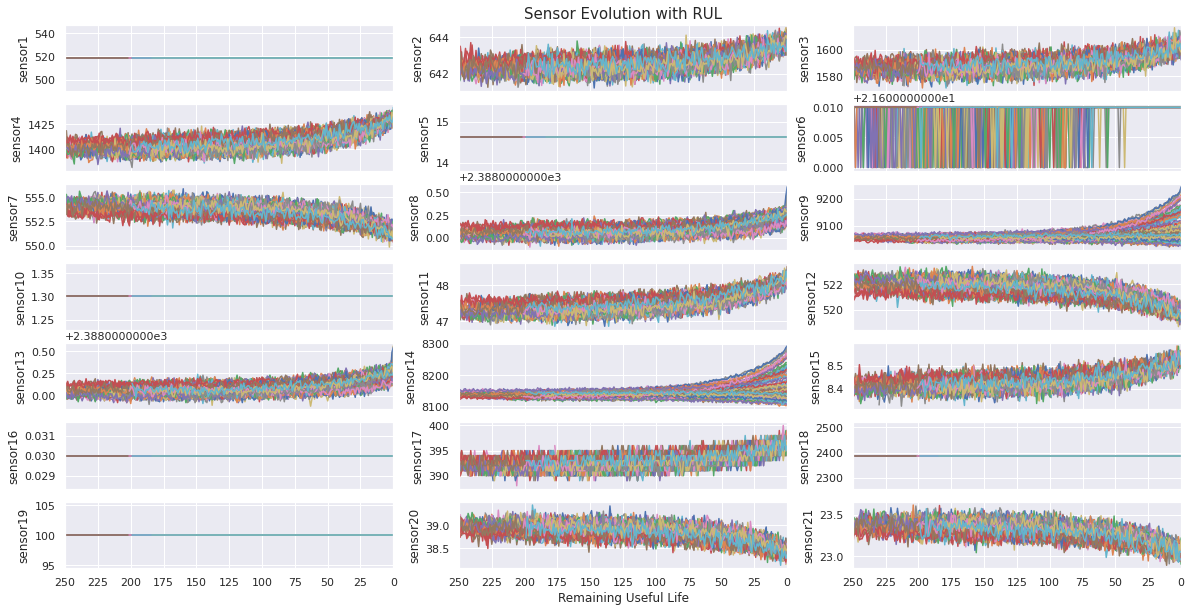

In [5]:
fig, axes = plot.show_sensors(train, header[n_meta:])
fig.show()

### Correlation Between Sensors

In [6]:
corr = plot.show_correlation(train, unit=1.0, n_meta=n_meta)
corr

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
sensor1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor2,nan,1.000000,0.533993,0.715269,nan,nan,-0.689220,0.725279,-0.378998,nan,0.708922,-0.709456,0.693127,-0.650320,0.637358,nan,0.648227,nan,nan,-0.688684,-0.674936,-0.693328
sensor3,nan,0.533993,1.000000,0.600408,nan,nan,-0.612002,0.618465,-0.342261,nan,0.645837,-0.630684,0.613439,-0.593247,0.544743,nan,0.546326,nan,nan,-0.470541,-0.583546,-0.583419
sensor4,nan,0.715269,0.600408,1.000000,nan,nan,-0.799178,0.814944,-0.425710,nan,0.817344,-0.838041,0.818932,-0.757210,0.727886,nan,0.691186,nan,nan,-0.722416,-0.744528,-0.824079
sensor5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor7,nan,-0.689220,-0.612002,-0.799178,nan,nan,1.000000,-0.809018,0.402133,nan,-0.792531,0.786699,-0.829037,0.759236,-0.705017,nan,-0.655866,nan,nan,0.744735,0.709113,0.798544
sensor8,nan,0.725279,0.618465,0.814944,nan,nan,-0.809018,1.000000,-0.458935,nan,0.849087,-0.827043,0.825950,-0.789041,0.716714,nan,0.683807,nan,nan,-0.715946,-0.760943,-0.805492
sensor9,nan,-0.378998,-0.342261,-0.425710,nan,nan,0.402133,-0.458935,1.000000,nan,-0.506415,0.466894,-0.446111,0.400020,-0.390066,nan,-0.392894,nan,nan,0.433904,0.409272,0.442325
sensor10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### PCA on Sensors

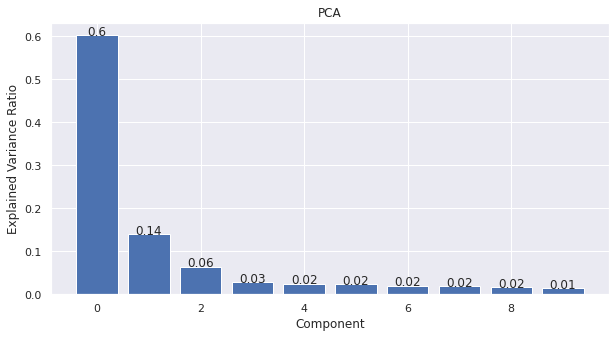

In [7]:
X = np.asarray(train[header[n_meta:]])
X = StandardScaler().fit_transform(X)

n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X)

fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(np.arange(n_components), pca.explained_variance_ratio_)
axes.set_ylabel('Explained Variance Ratio')
axes.set_xlabel('Component')
axes.set_title('PCA')

for i, var in enumerate(pca.explained_variance_ratio_):
    axes.text(i, var, str(round(var, 2)), ha='center')